# Clustering Comparison: Leiden vs Louvain

In [ ]:
import os
import bokeh
from bokeh.plotting import show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phenograph
import pacmap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import flowkit as fk

bokeh.io.output_notebook()
%matplotlib inline

### Load Samples & FlowJo 10 workspace

In [ ]:
base_dir = "../../../examples/data/8_color_data_set/"
sample_path = os.path.join(base_dir, "fcs_files")
wsp_path = os.path.join(base_dir, "8_color_ICS.wsp")

seed = 123

In [2]:
base_dir = "../../../examples/data/8_color_data_set/"
sample_path = os.path.join(base_dir, "fcs_files")
wsp_path = os.path.join(base_dir, "8_color_ICS.wsp")

seed = 123

In [3]:
session = fk.Session(sample_path)
session.import_flowjo_workspace(wsp_path)

In [4]:
sample_groups = session.get_sample_groups()
sample_groups

['default', 'All Samples', 'DEN']

In [5]:
sample_group = sample_groups[-1]

In [6]:
print(session.get_gate_hierarchy(sample_group, output='ascii'))

root
╰── Time
    ╰── Singlets
        ╰── aAmine-
            ╰── CD3+
                ├── CD4+
                │   ├── CD107a+
                │   ├── IFNg+
                │   ├── IL2+
                │   ╰── TNFa+
                ╰── CD8+
                    ├── CD107a+
                    ├── IFNg+
                    ├── IL2+
                    ╰── TNFa+


In [7]:
sample_ids = session.get_sample_ids()
sample_ids

['101_DEN084Y5_15_E03_009_clean.fcs',
 '101_DEN084Y5_15_E01_008_clean.fcs',
 '101_DEN084Y5_15_E05_010_clean.fcs']

### Run analyze_samples & retrieve gated events as DataFrames

In [8]:
session.analyze_samples(sample_group)

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


In [9]:
dfs = session.get_wsp_gated_events(sample_group, gate_name="Singlets")

In [10]:
dfs[0].head()

,sample_group,sample_id,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A,Time
1,DEN,101_DEN084Y5_15_E03_009_clean.fcs,0.484332,0.397831,0.304358,0.178974,0.165913,0.269681,0.242188,0.230791,0.282167,0.254901,0.244743,0.454572,0.276832,0.610560,0.029446
2,DEN,101_DEN084Y5_15_E03_009_clean.fcs,0.194679,0.158451,0.307160,0.169375,0.163517,0.258956,0.245903,0.312879,0.337170,0.338146,0.255419,0.219998,0.509837,0.231417,0.029487
3,DEN,101_DEN084Y5_15_E03_009_clean.fcs,0.474315,0.371048,0.319578,0.117765,0.111023,0.265181,0.246087,0.334186,0.286235,0.240530,0.239981,0.227485,0.293971,0.225222,0.029501
4,DEN,101_DEN084Y5_15_E03_009_clean.fcs,0.379263,0.326553,0.290353,0.253630,0.230423,0.275179,0.254722,0.293769,0.300224,0.253962,0.231450,0.571648,0.275452,0.327632,0.029584
5,DEN,101_DEN084Y5_15_E03_009_clean.fcs,0.571001,0.413601,0.345140,0.375197,0.322048,0.291258,0.606901,0.316733,0.331642,0.291612,0.266619,0.280217,0.380370,0.285660,0.029625


In [11]:
k = 10_000
X = pd.concat([df.iloc[:, 2:-1].sample(k) for df in dfs])

In [12]:
X.head()

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A
166174,0.466151,0.352581,0.330528,0.524860,0.440792,0.297680,0.448009,0.311854,0.420698,0.309095,0.266791,0.267338,0.450330,0.272003
177507,0.999996,0.814785,0.306828,0.332847,0.200302,0.415431,0.284856,0.333503,0.344302,0.274638,0.270582,0.570773,0.320207,0.680414
14719,0.519631,0.411106,0.315996,0.179145,0.166355,0.269221,0.265084,0.297346,0.286009,0.264009,0.245158,0.584641,0.280999,0.585838
71748,0.458232,0.377625,0.303365,0.230063,0.208755,0.275517,0.245382,0.390074,0.273719,0.261681,0.234747,0.240534,0.710890,0.250543
232981,0.553121,0.449764,0.307451,0.112263,0.107464,0.261164,0.243048,0.215157,0.245255,0.249968,0.247368,0.367362,0.280094,0.585937


### Perform Louvain & Leiden clustering

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
communities_louvain, graph_louvain, Q_louvain = phenograph.cluster(
    X_scaled, 
    clustering_algo='louvain', 
    seed=seed
)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 8.914389371871948 seconds
Jaccard graph constructed in 2.044022798538208 seconds
Wrote graph to binary file in 0.5202810764312744 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.85549
After 4 runs, maximum modularity is Q = 0.85749
After 19 runs, maximum modularity is Q = 0.858678
Louvain completed 39 runs in 64.66330027580261 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 76.5201096534729 seconds


In [15]:
communities_leiden, graph_leiden, Q_leiden = phenograph.cluster(
    X_scaled, 
    clustering_algo='leiden',
    seed=seed
)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 9.39779806137085 seconds
Jaccard graph constructed in 1.8151195049285889 seconds
Running Leiden optimization
Leiden completed in 4.078280925750732 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 16.41176176071167 seconds


In [16]:
titles = ['Leiden', 'Louvain']
communities = [communities_leiden, communities_louvain]

In [17]:
leiden_means = [
    X_scaled[communities_leiden==i, :].mean(axis=0)
    for i in np.unique(communities_leiden)
]
leiden_clusters = pd.DataFrame(
    leiden_means, 
    columns = X.columns, 
    index=np.unique(communities_leiden)
)
leiden_clusters.index.name = 'Cluster'

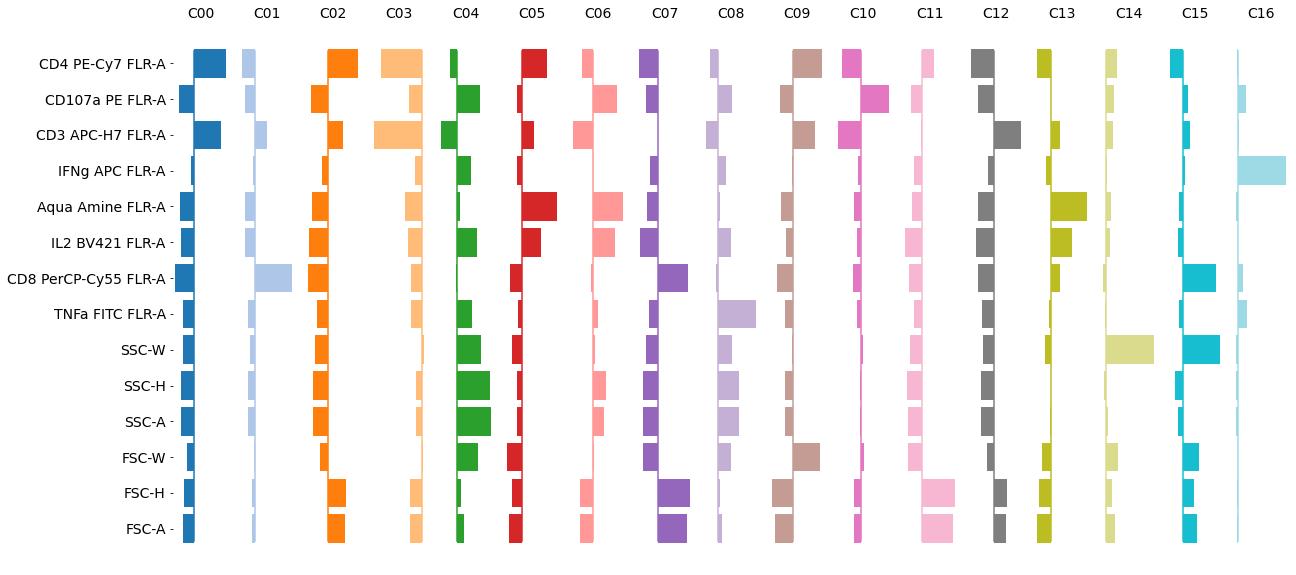

In [18]:
tab20 = plt.cm.get_cmap('tab20')
n, p = leiden_clusters.shape

fig, axes = plt.subplots(1, n, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
    ax.barh(range(p), leiden_clusters.iloc[i,:], color=tab20(int(i*(20+1)/n)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title(f'C{i:02d}', fontsize=14)
    ax.axvline(0, c=tab20(int(i*(20+1)/n)), ymin=0.05, ymax=0.95)
    
    if i == 0:
        ax.set_yticks(range(p))
        ax.set_yticklabels(leiden_clusters.columns,fontsize=14)

### Apply dimension reduction using PaCMAP

In [19]:
embedder = pacmap.PaCMAP()

In [20]:
X2 = embedder.fit_transform(X_scaled)

In [21]:
min_max_scaler = MinMaxScaler()
X2 = min_max_scaler.fit_transform(X2)

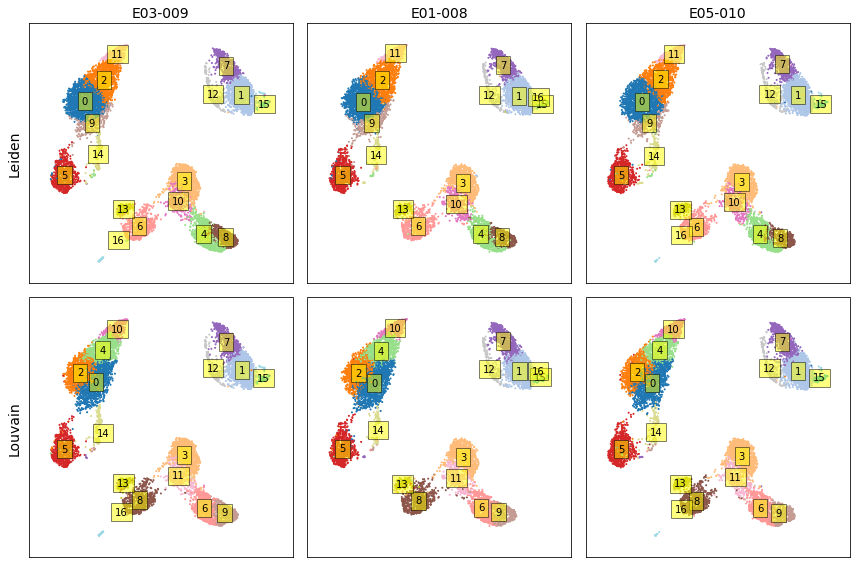

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, (community, title) in enumerate(zip(communities, titles)):
    for j in range(3):
        z = community[(j*k):(j+1)*k]
        x = X2[(j*k):(j+1)*k, 0]
        y = X2[(j*k):(j+1)*k, 1]
        
        ax = axes[i, j]
        ax.scatter(x, y, s=1, c=z, cmap='tab20')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim([-0.1,1.1])
        ax.set_ylim([-0.1,1.1])
        if j==0:
            ax.set_ylabel(title, fontsize=14)
        if i==0:
            ax.set_title('-'.join(sample_ids[j].split('_')[3:5]), fontsize=14)
            
        for idx in np.unique(z):
            x_, y_ = x[z==idx], y[z==idx]
            x_c, y_c = np.mean(x_), np.mean(y_)
            
            ax.text(
                x_c, 
                y_c, 
                str(idx), 
                va='center', 
                ha='center', 
                bbox=dict(fc='yellow', alpha=0.5)
            )
            
plt.tight_layout()